In [1]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('../raw_data_sales/superstore_sales_data.csv')

In [3]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
# Convert Order Date & Ship Date to Datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [6]:
# Rename Sales to Sales Revenue
df.rename(columns={'Sales': 'Sales Revenue'}, inplace=True)

In [7]:
# Round Sales Revenue to 2 decimal places
df['Sales Revenue'] = df['Sales Revenue'].round(2)

In [8]:
# Rename Postal Code to Zip Code
df.rename(columns={'Postal Code': 'Zip Code'}, inplace=True)

In [9]:
# Assess null values
missing_values = df.isnull().sum()
missing_values

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Zip Code         11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales Revenue     0
dtype: int64

In [10]:
# Fill null values in Zip Code with 00000
df['Zip Code'] = df['Zip Code'].fillna(99999)

In [11]:
# Convert Zip Code to Int to drop trailing zero and decimal point
df['Zip Code'] = df['Zip Code'].astype(int)

In [12]:
df['Zip Code'].unique()

array([42420, 90036, 33311, 90032, 28027, 98103, 76106, 53711, 84084,
       94109, 68025, 19140, 84057, 90049, 77095, 75080, 77041, 60540,
       32935, 55122, 48185, 19901, 47150, 10024, 12180, 90004, 60610,
       85234, 22153, 10009, 49201, 38109, 77070, 35601, 94122, 27707,
       60623, 29203, 55901, 55407, 97206, 55106, 80013, 28205, 60462,
       10035, 50322, 43229, 37620, 19805, 61701, 85023, 95661, 64055,
       91104, 43055, 53132, 85254, 95123, 98105, 98115, 73034, 90045,
       19134, 88220, 78207, 77036, 62521, 71203,  6824, 75051, 92374,
       45011,  7090, 19120, 44312, 80219, 75220, 37064, 90604, 48601,
       44256, 43017, 48227, 38401, 33614, 95051, 55044, 92037, 77506,
       94513, 27514,  7960, 45231, 94110, 90301, 33319, 80906,  7109,
       48180,  8701, 22204, 80004,  7601, 33710, 19143, 90805, 92345,
       37130, 84041, 78745,  1852, 31907,  6040, 78550, 85705, 62301,
        2038, 33024, 98198, 61604, 89115,  2886, 33180, 28403, 92646,
       40475, 80027,

In [13]:
# Replace invalid zip codes (not exactly 5 digits) with 99999 (zip code 99999 does not exist)
df['Zip Code'] = df['Zip Code'].apply(lambda x: x if 10000 <= x <= 99999 else 99999)

In [14]:
df['Country'].unique()

array(['United States'], dtype=object)

In [15]:
# All sales are in the United Sates and does not provide any more insight to our analysis so we will drop this column
df = df.drop(columns=['Country'])

In [16]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [17]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [18]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [19]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [20]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Zip Code       9800 non-null   int64         
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Product Name   9800 n

In [22]:
df['Sales Revenue'].describe()

count     9800.000000
mean       230.769036
std        626.651878
min          0.440000
25%         17.250000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales Revenue, dtype: float64

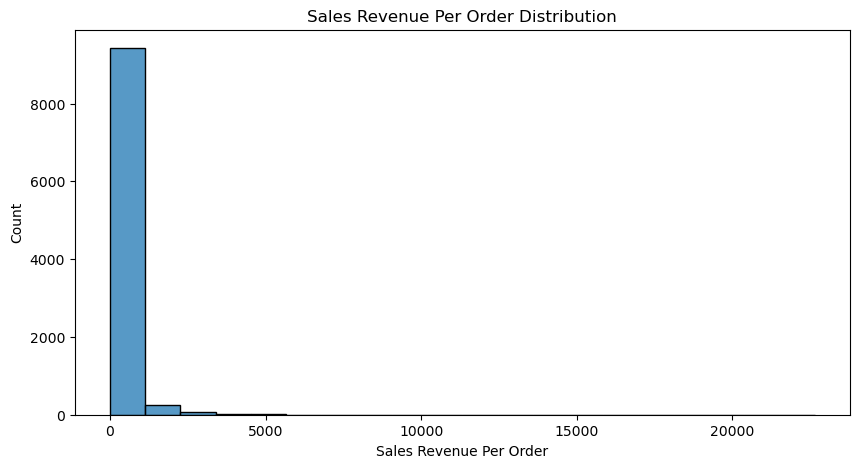

In [23]:
# Distribution of Sales Revenue Per Order
plt.figure(figsize=(10,5))
sales_hist = sns.histplot(x='Sales Revenue', data=df, bins=20)
sales_hist = plt.xlabel('Sales Revenue Per Order')
sales_hist = plt.ylabel('Count')
sales_hist = plt.title('Sales Revenue Per Order Distribution')

## We can clearly tell here that we have some outliers when it comes to Sales Revenue. We will dig further into this to see if this from an error in our data or if they are just large orders.

In [24]:
large_orders = df[df['Sales Revenue'] > 1000]

In [25]:
large_orders.shape

(462, 17)

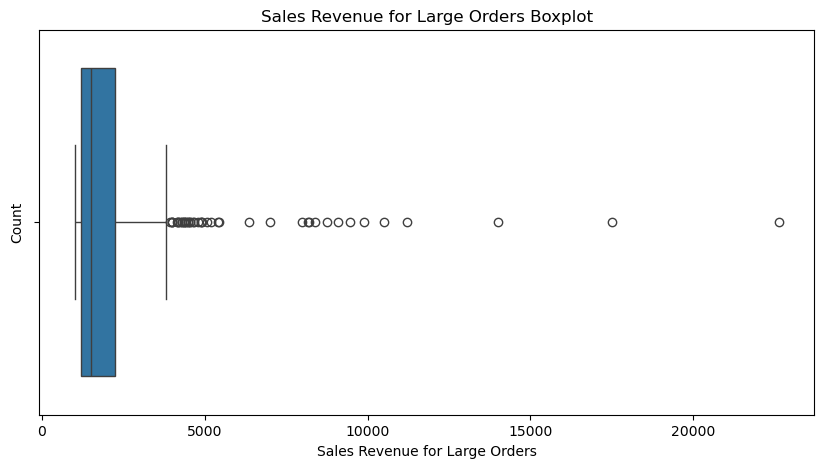

In [26]:
# Boxplot of Sales Revenue for Large Orders
plt.figure(figsize=(10,5))
large_sales_hist = sns.boxplot(x='Sales Revenue', data=large_orders)
large_sales_hist = plt.xlabel('Sales Revenue for Large Orders')
large_sales_hist = plt.ylabel('Count')
large_sales_hist = plt.title('Sales Revenue for Large Orders Boxplot')

## When looking at only orders greater than 1,000 in sales revenue, of which there are 462, seeing this many outliers above 1.5 * the inner quartile range shows lends evidence to there just being a number of large orders in our data rather than there being some kind of error.

## Now that we know the outliers are not in error, let's look at the distribution of orders less than or equal to 1,000 in sales revenue

In [27]:
most_orders = df[df['Sales Revenue'] <= 1000]

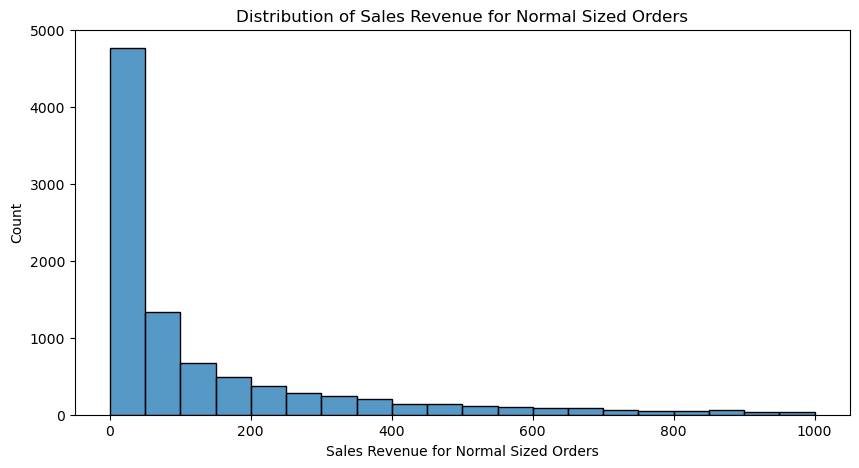

In [28]:
# Distribution of Sales Revenue Per Normal Order Size
plt.figure(figsize=(10,5))
normal_sales_hist = sns.histplot(x='Sales Revenue', data=most_orders, bins=20)
normal_sales_hist = plt.xlabel('Sales Revenue for Normal Sized Orders')
normal_sales_hist = plt.ylabel('Count')
normal_sales_hist = plt.title('Distribution of Sales Revenue for Normal Sized Orders')

## We can now more easily see that almost half of all orders in our data are $50 or below in sales revenue.

## Next, let's take a quick look at sales over time to ensure everything looks correct.

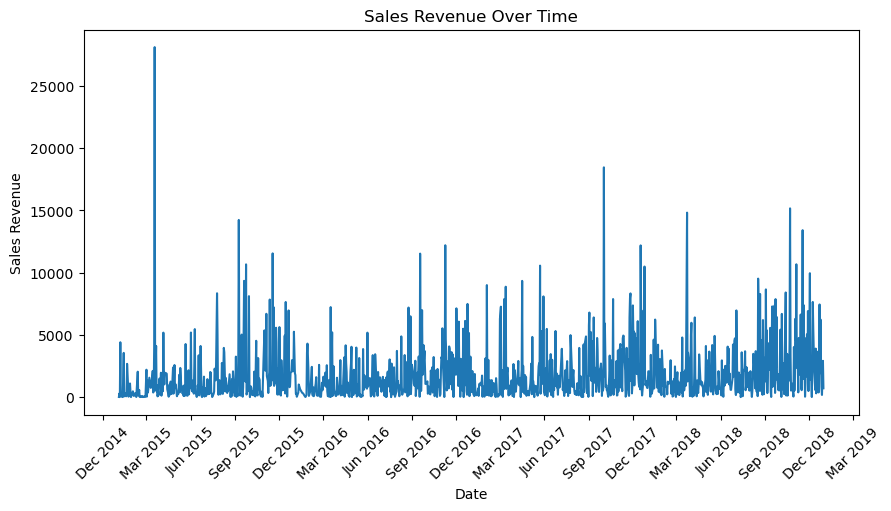

In [29]:
# Lineplot of Sales Revenue Over Time
plt.figure(figsize=(10,5))
sales_over_time = sns.lineplot(x= 'Order Date', y='Sales Revenue',
                               data=df.groupby('Order Date').agg({'Sales Revenue': 'sum'}).reset_index())
sales_over_time = plt.xlabel('Date')
sales_over_time = plt.ylabel('Sales Revenue')
sales_over_time = plt.title('Sales Revenue Over Time')
sales_over_time = plt.xticks(rotation=45)
# Set the x-axis ticks to show every 3 months
sales_over_time = plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
sales_over_time = plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

## This is a little cluttered, let's aggregate sales revenue by month and see if that gives us an easier to read plot

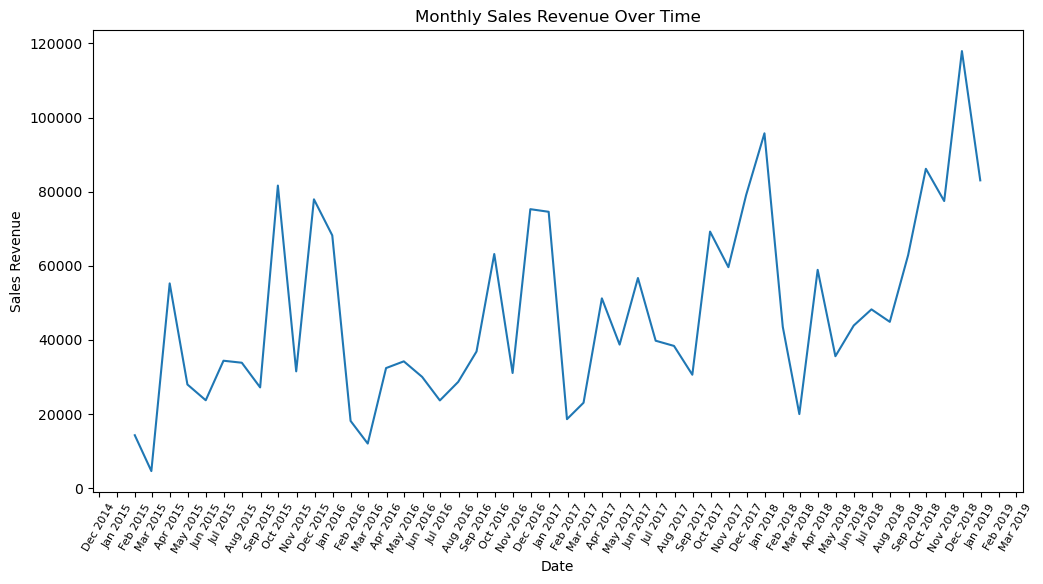

In [30]:
# Aggregate data by month
df_monthly = df.groupby(pd.Grouper(key='Order Date', freq='M')).agg({'Sales Revenue': 'sum'}).reset_index()

# Lineplot of Monthly Sales Revenue
plt.figure(figsize=(12, 6))
monthly_sales_over_time = sns.lineplot(x='Order Date', y='Sales Revenue', data=df_monthly)
monthly_sales_over_time = plt.xlabel('Date')
monthly_sales_over_time = plt.ylabel('Sales Revenue')
monthly_sales_over_time = plt.title('Monthly Sales Revenue Over Time')
monthly_sales_over_time = plt.xticks(rotation=60, fontsize=8)
# Set x-axis ticks to show every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

## That's better. This shows we have some seasonality and our sales overall are increasing over time.

In [31]:
# Save Cleaned DataFrame as CSV
df.to_csv('../data/cleaned_sales_data', index=False)

# Summary

Our data wasn't too dirty this time but did require cleaning. 

Order Date & Ship Date was converted to Datetime so we can use the data in EDA.

The Sales column was renamed to Sales Revenue so as not to be ambiguous with the number of sales. Sales Revenue was then rounded to two decimal places.

Postal Code was renamed to Zip Code as that is more commonly used.

The only null values we had were in the Zip Code column so nulls were filled as 99999 as this is not a real zip code. The Zip Code column was then converted to integers to drop the decimal point and trailing 0. After further inspection, some zip codes had only 4 digits which I determined was in error as there are no 4 digit zip codes. These zip code errors were also changed to 99999 to keep it consistent.

All other columns were inspected to ensure there were not similar errors. In doing so, I found that all values in the Country column were United States so this column was dropped as it provided no further value in our analysis.

Our Sales Revenue column was then statistically inspected and the max value seemed to be a very large outlier. I plotted the distribution and confirmed this. To ensure this observation was not an error to be dropped, I filtered for only Sales Revenue values over 1,000 and found that there were 462 instances. These were plotted as a boxplot and as there were quite a few observations outside 1.5*IQR, I determined that these values are not in error, they are simply large orders.

I then looked at the distribution of orders with Sales Revenue less than or equal to 1,000 and found that almost half of all orders in our data are $50 or below in sales revenue.

Turning to look at Sales Revenue over time, we can see we have sales data spanning 5 years so the intial plot was too cluttered to be that useful. After aggregating Sales Revenue per month, this showed we have some seasonality in our sales but our sales overall are increasing over time.

Lastly, we exported the cleaned data to a CSV file.